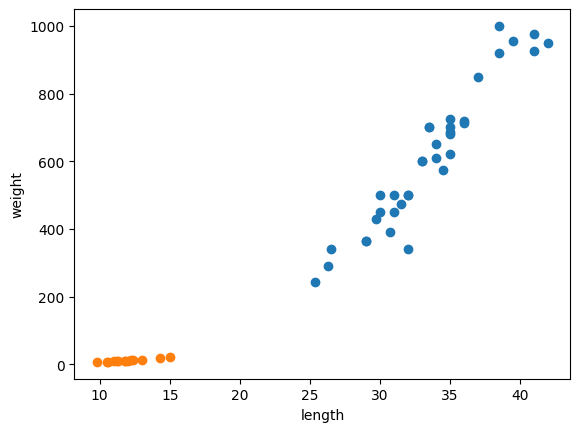

36
14


In [1]:
import matplotlib.pyplot as plt #약어로 줄여서

bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 42.0]
bream_weight = [242.0, 290.0, 340.0,363.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.6, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

print(len(bream_length))
print(len(smelt_length))

In [2]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

fish_data = [[l, w] for l, w in zip(length, weight)] #리스트 내포
fish_target = [1]*36 + [0]*14 # 35개의 데이터, 14개의 데이터 => 하나의 리스트로 제작 /// 찾아야 할 대상 1로
print(len(fish_data))
print(len(fish_target))

50
50


In [3]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier() # 클래스의 객체를 만든다. (kn으로 저장)
kn.fit(fish_data, fish_target) #kn을 머신러닝 모델로
kn.score(fish_data, fish_target) # score method로 얼마나 많이 맞았냐 테스트

1.0

In [4]:
kn50 = KNeighborsClassifier(n_neighbors=50)

kn50.fit(fish_data, fish_target)
kn50.score(fish_data, fish_target)


0.72

In [5]:
train_input = fish_data[:35]
train_target = fish_target[:35]

test_input = fish_data[35:]
test_target = fish_target[35:]

In [6]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier() # 클래스의 객체를 만든다. (kn으로 저장)
kn.fit(train_input, train_target) #kn을 머신러닝 모델로
kn.score(test_input, test_target)

0.06666666666666667

In [7]:
import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

index = np.arange(50)
np.random.shuffle(index)

train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]


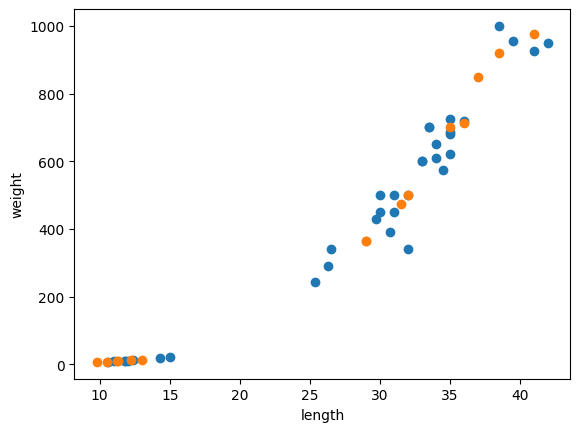

In [8]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:, 0], train_input[:, 1]) #행, 열
plt.scatter(test_input[:, 0], test_input[:, 1]) #행, 열

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [9]:
kn = kn.fit(train_input, train_target)

kn.score(test_input, test_target)

1.0

In [10]:
fish_data = np.column_stack((length, weight))
fish_target = np.concatenate((np.ones(36), np.zeros(14)))
print(len(fish_data))
print(len(fish_target))

50
50


In [14]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state = 42)

print(test_input)

[[ 26.5 340. ]
 [ 11.    9.7]
 [ 29.7 430. ]
 [ 11.8   9.9]
 [ 34.5 575. ]
 [ 37.  850. ]
 [ 26.3 290. ]
 [ 11.8  10. ]
 [ 42.  950. ]
 [ 31.5 475. ]
 [ 35.  620. ]
 [ 12.4  13.4]
 [ 39.5 955. ]]


[0.]


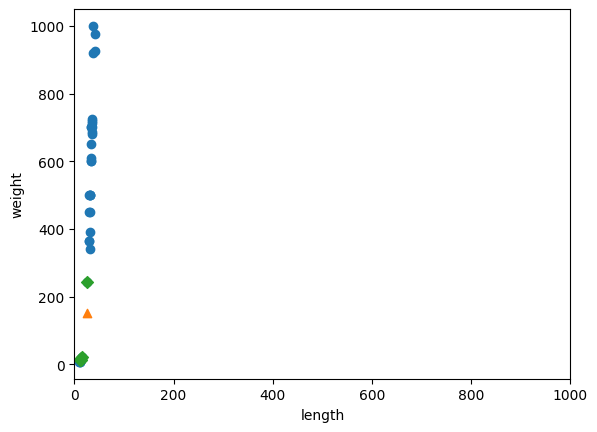

In [19]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

print(kn.predict([[25, 150]])) # 그래프를 봤을 때 25, 150은 도미에 가까워 보이는데 왜 [0.]일까? 두 특성의 scale이 다르기 때문에 scale을 맞춰줘야 한다.

distances, indexes = kn.kneighbors([[25, 150]])

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker = '^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D') # 배열 인덱싱
plt.xlim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [21]:
mean = np.mean(train_input, axis = 0)
std = np.std(train_input, axis = 0)

print(mean, std)

train_scaled = (train_input - mean) / std
print(train_scaled)

[ 27.67567568 449.08378378] [ 10.05373147 314.40965661]
